In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib

# Data preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# K means 
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

# Silhouette score 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")

# K means 
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors


from sklearn.cluster import DBSCAN

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Preprocessing 

In [2]:
reviews = pd.read_csv("final_reviews.csv")

In [3]:
reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,emankcin,bought this used and it came in great conditio...,good,good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,Starbucks Fan,every story and book about corduroy is fantast...,best books for all children,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,i purchased this book for my first grade class...,great for math!,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,E. Ervin,having spent numerous years in an elementary s...,love corduroy,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019553,5.0,True,2016-12-31,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,night hawk is ten outstanding new recordings o...,"My favorite cut is the cover of ""(Ghost) Rider...",great,Night Hawk,"['0718074963', 'B0012GMV5S', 'B00I89Y2SQ', 'B0...",charlie daniels band,68288.0,"['B07H5VY3LK', 'B00FLV06V6', 'B00I89Y2SQ', 'B0...",Digital Music,8.00,['Country'],['Country'],NaN
2019554,3.0,True,2018-07-25,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,ok,Three Stars,average,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019555,5.0,True,2018-07-17,A5HIGHKQPINEO,B01HJG3VZI,Oman,great music great sound love the music lots of...,The sound quality and number of hits,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019556,5.0,True,2018-06-23,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,really good fun quality stuff,5fer,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN


In [4]:
data = reviews[(reviews.main_cat == 'Digital Music')| (reviews.main_cat == 'Office Products')]
data

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,emankcin,bought this used and it came in great conditio...,good,good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,Starbucks Fan,every story and book about corduroy is fantast...,best books for all children,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,i purchased this book for my first grade class...,great for math!,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,E. Ervin,having spent numerous years in an elementary s...,love corduroy,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019553,5.0,True,2016-12-31,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,night hawk is ten outstanding new recordings o...,"My favorite cut is the cover of ""(Ghost) Rider...",great,Night Hawk,"['0718074963', 'B0012GMV5S', 'B00I89Y2SQ', 'B0...",charlie daniels band,68288.0,"['B07H5VY3LK', 'B00FLV06V6', 'B00I89Y2SQ', 'B0...",Digital Music,8.00,['Country'],['Country'],NaN
2019554,3.0,True,2018-07-25,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,ok,Three Stars,average,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019555,5.0,True,2018-07-17,A5HIGHKQPINEO,B01HJG3VZI,Oman,great music great sound love the music lots of...,The sound quality and number of hits,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019556,5.0,True,2018-06-23,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,really good fun quality stuff,5fer,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN


In [5]:
a = data.groupby("asin")['asin'].count()
a = pd.DataFrame(a)
a

,asin
asin,
0001393774,13
0005164885,140
0005465079,7
0140503528,11
0439394058,9
...,...
B01HIE1OYQ,5
B01HIL946E,5
B01HINXMPG,6


In [6]:
a.rename(columns = {"asin":"Product ID"}, inplace = True)
a.reset_index(inplace = True)
a.rename(columns = {"asin":"ProductID", "Product ID":"order_count"}, inplace = True)
a

,ProductID,order_count
0,0001393774,13
1,0005164885,140
2,0005465079,7
3,0140503528,11
4,0439394058,9
...,...,...
86738,B01HIE1OYQ,5
86739,B01HIL946E,5
86740,B01HINXMPG,6
86741,B01HJDG28E,6


In [7]:
c = data.groupby("asin")['price'].sum()
c = pd.DataFrame(c)
c.reset_index(inplace  =  True)
c.rename(columns = {"price":"total_sales"},inplace = True)
c.rename(columns = {"asin":"ProductID"}, inplace = True)
c

,ProductID,total_sales
0,0001393774,212.192322
1,0005164885,837.200000
2,0005465079,112.162395
3,0140503528,10.450000
4,0439394058,97.110000
...,...,...
86738,B01HIE1OYQ,69.900000
86739,B01HIL946E,79.811684
86740,B01HINXMPG,59.880000
86741,B01HJDG28E,48.000000


In [8]:
merge = a.merge(c,how="left", on = "ProductID")
merge

,ProductID,order_count,total_sales
0,0001393774,13,212.192322
1,0005164885,140,837.200000
2,0005465079,7,112.162395
3,0140503528,11,10.450000
4,0439394058,9,97.110000
...,...,...,...
86738,B01HIE1OYQ,5,69.900000
86739,B01HIL946E,5,79.811684
86740,B01HINXMPG,6,59.880000
86741,B01HJDG28E,6,48.000000


In [9]:
merge.sort_values('order_count').head(20)

,ProductID,order_count,total_sales
50943,B00134QBQE,1,131.710000
49913,B000XULNG2,1,9.980000
49914,B000XULNR6,1,9.980000
66458,B008LXBXFO,1,120.000000
36476,B00011REVQ,1,12.630000
50525,B00120FCNW,1,15.620382
49640,B000WL6Z6K,1,16.011159
50785,B0012OTHUM,1,8.740000
51299,B00147TPAO,1,16.372668
51490,B00159UL6I,1,15.972056


In [10]:
merge.sort_values('order_count').tail(20)

,ProductID,order_count,total_sales
50155,B000ZHB2HS,1037,17929.730000
81150,B00XXNU90W,1043,16962.864526
78712,B00QHBMKOU,1069,10679.310000
32841,B00006IFAY,1117,8008.890000
50284,B0010JEJPC,1136,5123.360000
76170,B00L98V4UW,1183,10635.170000
33205,B00006JNNS,1233,33525.270000
68270,B00AVWKUJS,1241,20483.095641
52452,B0018NC2SQ,1316,10409.560000
82030,B0124I9AWO,1326,67692.300000


In [11]:
merge.order_count.describe()

count    86743.000000
mean        20.967813
std         44.256302
min          1.000000
25%          6.000000
50%         10.000000
75%         19.000000
max       2246.000000
Name: order_count, dtype: float64

In [12]:
merge[merge.order_count > 500].count()

ProductID      91
order_count    91
total_sales    91
dtype: int64

In [13]:
df1 =  merge.copy()

In [14]:
lst = []
for i in merge.order_count:
    if i >= 500:
        lst.append("Very High")
    elif 500 > i >= 100:
        lst.append("High")
    elif 100 > i >= 20:
        lst.append("Average")    
    elif 20 > i >= 5 :
        lst.append("Low")
    else:
        lst.append("Very Low") 
        
df1.demand = pd.DataFrame(lst)        
df1.demand.value_counts()

Low          64613
Average      18695
High          2518
Very Low       825
Very High       92
dtype: int64

In [15]:
df1.isnull().sum()

ProductID      0
order_count    0
total_sales    0
dtype: int64

# Feature engineering

In [16]:
df2 = merge.copy()
df2

,ProductID,order_count,total_sales
0,0001393774,13,212.192322
1,0005164885,140,837.200000
2,0005465079,7,112.162395
3,0140503528,11,10.450000
4,0439394058,9,97.110000
...,...,...,...
86738,B01HIE1OYQ,5,69.900000
86739,B01HIL946E,5,79.811684
86740,B01HINXMPG,6,59.880000
86741,B01HJDG28E,6,48.000000


In [17]:
df2.dtypes

ProductID       object
order_count      int64
total_sales    float64
dtype: object

In [18]:
# df2["sales"] = df2["sales"].astype('category')

# df2["sales"] = LabelEncoder().fit_transform(df2["sales"])

# df2.dtypes
# df2

In [19]:
merge.columns

Index(['ProductID', 'order_count', 'total_sales'], dtype='object')

# Data Scaling - Normalisation 

In [20]:
df3 = merge[['order_count', 'total_sales']]
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df3), columns = df3.columns)

scaled_df

,order_count,total_sales
0,0.005345,0.002172
1,0.061915,0.008570
2,0.002673,0.001148
3,0.004454,0.000106
4,0.003563,0.000994
...,...,...
86738,0.001782,0.000715
86739,0.001782,0.000817
86740,0.002227,0.000612
86741,0.002227,0.000491


In [21]:
scaled_df.columns

Index(['order_count', 'total_sales'], dtype='object')

# Kmean Clustering

In [22]:
df_r = scaled_df

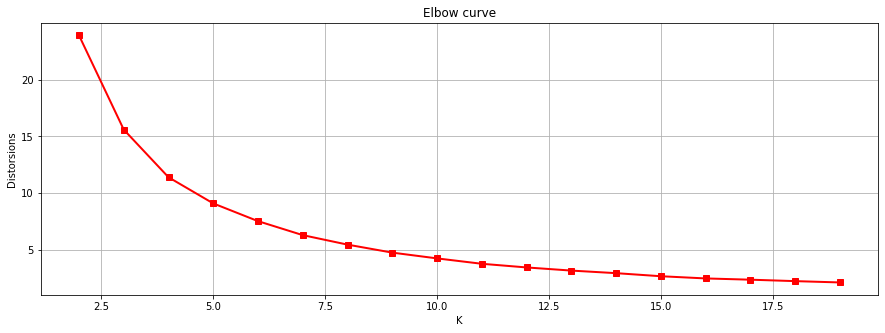

In [23]:
distorsions = []  
for k in range(2, 20):
    model_kmeans1 = KMeans(n_clusters=k)
    model_kmeans1.fit(df_r)
    distorsions.append(model_kmeans1.inertia_) 

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, marker='s', c='r', linewidth = 2)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [24]:
# Calculating silhouette scores 

range_n_clusters = np.arange(2,6)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)

    silhouette_avg = silhouette_score(df_r, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9141452232752907
For n_clusters = 3 The average silhouette_score is : 0.8729595188776342
For n_clusters = 4 The average silhouette_score is : 0.8202546359280973
For n_clusters = 5 The average silhouette_score is : 0.7584406299611395


In [25]:
kmean = KMeans(n_clusters = 3)
kmean.fit(df_r)

KMeans(n_clusters=3)

In [26]:
labels = kmean.fit_predict(df_r)
labels

array([1, 2, 1, ..., 1, 1, 1])

In [27]:
kmean_df = df_r.copy()
kmean_df['label-Kmean'] = pd.DataFrame(labels)
kmean_count = pd.DataFrame(kmean_df['label-Kmean'].value_counts())
kmean_count

,label-Kmean
1,83441
2,3180
0,122


In [28]:
silhouette_kmean = silhouette_score(df_r, labels)
print("Silhouette Score = {} ".format(silhouette_kmean))

Silhouette Score = 0.8711319770226951 


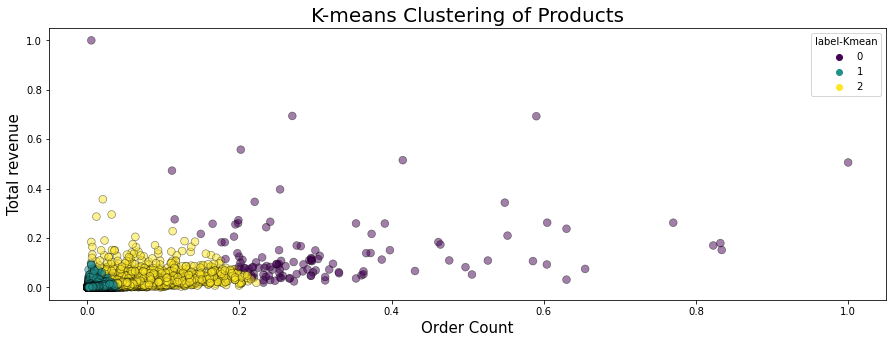

In [29]:
plt.figure(figsize = (15,5))

sb.scatterplot(x = kmean_df['order_count'] , y = kmean_df["total_sales"], hue = kmean_df['label-Kmean'], data=kmean_df,palette = 'viridis', s = 60, ec = 'black', alpha = 0.5)
plt.title('K-means Clustering of Products',size = 20)
plt.xlabel("Order Count",size = 15)
plt.ylabel("Total revenue",size = 15)

plt.show()

## Label 2 denotes categories with high price and high rating
## Label 1 denotes categories with low price and high rating 
## Label 0 denotes categories with low price and low rating

# It is evident from the above graph that 

In [30]:
df4 = df3.copy()
df4["ProductID"] = merge['ProductID']
df4['label'] = labels
df4


,order_count,total_sales,ProductID,label
0,13,212.192322,0001393774,1
1,140,837.200000,0005164885,2
2,7,112.162395,0005465079,1
3,11,10.450000,0140503528,1
4,9,97.110000,0439394058,1
...,...,...,...,...
86738,5,69.900000,B01HIE1OYQ,1
86739,5,79.811684,B01HIL946E,1
86740,6,59.880000,B01HINXMPG,1
86741,6,48.000000,B01HJDG28E,1


In [31]:
df4[df4.label == 2].describe()

,order_count,total_sales,label
count,3180.000000,3180.000000,3180.0
mean,154.099057,2305.794290,2.0
std,75.124014,2359.295899,0.0
min,13.000000,2.170000,2.0
25%,102.000000,1052.190000,2.0
50%,129.000000,1648.676955,2.0
75%,180.000000,2644.005000,2.0
max,500.000000,34866.480000,2.0


In [32]:
df4[df4.label == 1].describe()

,order_count,total_sales,label
count,83441.000000,83441.000000,83441.0
mean,14.873360,227.089307,1.0
std,14.299141,328.866517,0.0
min,1.000000,0.050000,1.0
25%,6.000000,79.950000,1.0
50%,9.000000,129.310031,1.0
75%,17.000000,249.250000,1.0
max,93.000000,9599.880000,1.0


In [33]:
df4[df4.label == 0].describe()

,order_count,total_sales,label
count,122.000000,122.000000,122.0
mean,719.081967,14321.602332,0.0
std,363.333546,14545.219173,0.0
min,13.000000,1896.440000,0.0
25%,501.000000,6057.427500,0.0
50%,602.500000,9576.900000,0.0
75%,806.000000,16870.908394,0.0
max,2246.000000,97684.470000,0.0


In [34]:
x = data[['asin','title','main_cat','primary_category',"sub_cat"]]

In [35]:
y = df4.merge(x,how = 'left', left_on = "ProductID", right_on='asin' )
y = y.drop_duplicates(keep = 'first', ignore_index = True)
y.drop('asin', axis = 1, inplace = True)
y

,order_count,total_sales,ProductID,label,title,main_cat,primary_category,sub_cat
0,13,212.192322,0001393774,1,Songs for the Shepherd,Digital Music,['Christian'],['Christian']
1,140,837.200000,0005164885,2,Christmas Eve and Other Stories,Digital Music,['Holiday & Wedding'],['Holiday & Wedding']
2,7,112.162395,0005465079,1,Forgiven,Digital Music,['Christian'],['Pop & Contemporary']
3,11,10.450000,0140503528,1,A Pocket for Corduroy,Office Products,['Office and School Supplies'],['Education and Crafts']
4,9,97.110000,0439394058,1,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products,['Office and School Supplies'],['Presentation Boards']
...,...,...,...,...,...,...,...,...
86738,5,69.900000,B01HIE1OYQ,1,Yellowcard,Digital Music,['Pop'],['Pop']
86739,5,79.811684,B01HIL946E,1,MOUNTEC Compact Smart Key Holder Built to Last...,Office Products,['Office and School Supplies'],"['Forms, Recordkeeping and Money Handling']"
86740,6,59.880000,B01HINXMPG,1,Crossroads,Digital Music,['Classical'],['Classical']
86741,6,48.000000,B01HJDG28E,1,Night Hawk,Digital Music,['Country'],['Country']


In [36]:
y[y.label == 2]

,order_count,total_sales,ProductID,label,title,main_cat,primary_category,sub_cat
1,140,837.200000,0005164885,2,Christmas Eve and Other Stories,Digital Music,['Holiday & Wedding'],['Holiday & Wedding']
59,121,1921.797090,1439716048,2,Safavid Storage Box,Office Products,['Office and School Supplies'],"['Calendars, Planners and Personal Organizers']"
107,120,730.800000,1601061870,2,Knock Knock High Five Nifty Note Pad,Office Products,['Office and School Supplies'],['Paper']
162,111,1760.011870,1622263995,2,Orange Circle Studio 2015 Weekly Desk Pad Cale...,Office Products,['Office and School Supplies'],['Paper']
178,115,1601.273809,1858704553,2,Chickenfoot III: Classic Rock,Digital Music,['Rock'],['Hard Rock']
...,...,...,...,...,...,...,...,...
86451,183,1002.840000,B01GKJQN8C,2,Encore: Movie Partners Sing Broadway,Digital Music,['Pop'],['Vocal Pop']
86477,91,1694.420000,B01GPHA3YO,2,Blue Sky 2017 Weekly &amp; Monthly Planner Wit...,Office Products,['Office and School Supplies'],"['Calendars, Planners and Personal Organizers']"
86494,119,1946.062634,B01GPHAMQ8,2,"Blue Sky 2017 Weekly &amp; Monthly Planner, Wi...",Office Products,['Office and School Supplies'],"['Calendars, Planners and Personal Organizers']"
86510,92,1195.080000,B01GQREXO4,2,TYH Supplies Economy 11 Hole Clear Sheet Prote...,Office Products,['Office and School Supplies'],['Binders and Binding Systems']


In [37]:
lst=[]
for i in y.sub_cat:
    i = str(i)
    i = i.split('[')[1] 
    i = i.split(']')[0]
    i = i.strip('\"')
    i = i.strip("\'")
   
    #i = i.replace["\'s ",'']
    lst.append(i)
lst

lst1=[]
for i in y.primary_category:
    i = str(i)
    i = i.split('[')[1] 
    i = i.split(']')[0]
    i = i.strip('\"')
    i = i.strip("\'")
   
    #i = i.replace["\'s ",'']
    lst1.append(i)
lst1

y.sub_cat = lst

y.primary_category = lst1
y.head()

,order_count,total_sales,ProductID,label,title,main_cat,primary_category,sub_cat
0,13,212.192322,0001393774,1,Songs for the Shepherd,Digital Music,Christian,Christian
1,140,837.200000,0005164885,2,Christmas Eve and Other Stories,Digital Music,Holiday & Wedding,Holiday & Wedding
2,7,112.162395,0005465079,1,Forgiven,Digital Music,Christian,Pop & Contemporary
3,11,10.450000,0140503528,1,A Pocket for Corduroy,Office Products,Office and School Supplies,Education and Crafts
4,9,97.110000,0439394058,1,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products,Office and School Supplies,Presentation Boards


In [38]:
high = y[['ProductID','title','main_cat','primary_category','sub_cat']][y.label == 2]
high

,ProductID,title,main_cat,primary_category,sub_cat
1,0005164885,Christmas Eve and Other Stories,Digital Music,Holiday & Wedding,Holiday & Wedding
59,1439716048,Safavid Storage Box,Office Products,Office and School Supplies,"Calendars, Planners and Personal Organizers"
107,1601061870,Knock Knock High Five Nifty Note Pad,Office Products,Office and School Supplies,Paper
162,1622263995,Orange Circle Studio 2015 Weekly Desk Pad Cale...,Office Products,Office and School Supplies,Paper
178,1858704553,Chickenfoot III: Classic Rock,Digital Music,Rock,Hard Rock
...,...,...,...,...,...
86451,B01GKJQN8C,Encore: Movie Partners Sing Broadway,Digital Music,Pop,Vocal Pop
86477,B01GPHA3YO,Blue Sky 2017 Weekly &amp; Monthly Planner Wit...,Office Products,Office and School Supplies,"Calendars, Planners and Personal Organizers"
86494,B01GPHAMQ8,"Blue Sky 2017 Weekly &amp; Monthly Planner, Wi...",Office Products,Office and School Supplies,"Calendars, Planners and Personal Organizers"
86510,B01GQREXO4,TYH Supplies Economy 11 Hole Clear Sheet Prote...,Office Products,Office and School Supplies,Binders and Binding Systems


In [39]:
high.to_csv("High_demanding_products.csv", index = False)

In [40]:
mid = y[['ProductID','title','main_cat','primary_category','sub_cat']][y.label == 1]
mid

,ProductID,title,main_cat,primary_category,sub_cat
0,0001393774,Songs for the Shepherd,Digital Music,Christian,Christian
2,0005465079,Forgiven,Digital Music,Christian,Pop & Contemporary
3,0140503528,A Pocket for Corduroy,Office Products,Office and School Supplies,Education and Crafts
4,0439394058,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products,Office and School Supplies,Presentation Boards
5,0439505399,Scholastic Weather Dial Chart (TF2131),Office Products,Office and School Supplies,Education and Crafts
...,...,...,...,...,...
86738,B01HIE1OYQ,Yellowcard,Digital Music,Pop,Pop
86739,B01HIL946E,MOUNTEC Compact Smart Key Holder Built to Last...,Office Products,Office and School Supplies,"Forms, Recordkeeping and Money Handling"
86740,B01HINXMPG,Crossroads,Digital Music,Classical,Classical
86741,B01HJDG28E,Night Hawk,Digital Music,Country,Country


In [41]:
mid.to_csv("Mid_demanding_products.csv", index = False)

In [42]:
low = y[['ProductID','title','main_cat','primary_category','sub_cat']][y.label == 0]
low

,ProductID,title,main_cat,primary_category,sub_cat
1091,B000000IVW,Appetite for Destruction,Digital Music,Classic Rock,Album-Oriented Rock (AOR)
1369,B000000W5N,Sticky Fingers,Digital Music,Classic Rock,Album-Oriented Rock (AOR)
2672,B000001DVQ,"Greatest Hits, Vol. 1",Digital Music,World Music,Europe
3506,B000001FY9,The best of Bob Marley &amp; The Wailers: Legend,Digital Music,World Music,Caribbean & Cuba
5072,B00000254C,Wish You Were Here,Digital Music,World Music,Europe
...,...,...,...,...,...
81150,B00XXNU90W,3M Precise Mouse Pad Enhances the Precision of...,Office Products,Office and School Supplies,Paper
81245,B00YD9KCMU,Stages,Digital Music,Pop,Pop
81481,B00ZGQD4GU,Bold 60 Gel Pens Set Colored Gel Pen plus for ...,Office Products,Office and School Supplies,Writing and Correction Supplies
82030,B0124I9AWO,"Rolodex Mesh Collection Jumbo Pencil Cup, Blac...",Office Products,Office and School Supplies,Desk Accessories and Workspace Organizers


In [43]:
low.to_csv("Low_demanding_products.csv", index = False)

In [44]:
## Agglomerative 

In [45]:

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df_r)
distances, indices = nbrs.kneighbors(df_r)

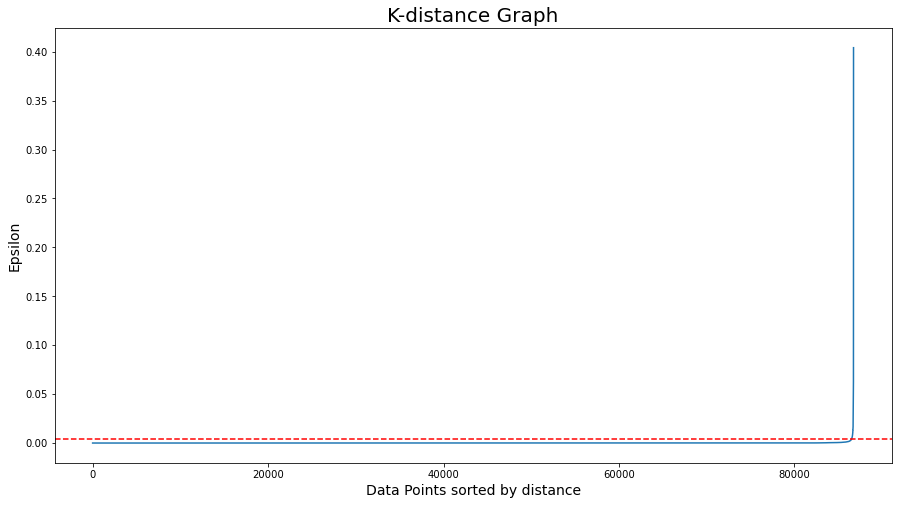

In [46]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.004, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [47]:
for eps in [0.005,0.01,0.02]:    
    for min_samples in [3,4,5]:
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(df_r)
        x= cluster_labels +2
        y = np.bincount(x)
        ii = np.nonzero(y)[0]
        results = list(zip(ii,y[ii]) )
        print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results), '| Silhouette score',silhouette_score(df_r, cluster_labels))
    print("-------------------------------------------------------------------------------------")

MemoryError: 